# **THE SPARKS FOUNDATION**
# Data Science & Business Analytics Internship
# By **Kamran khan**
# TASK-3 : Perform "Exploratory Data Analysis" on dataset ‘SampleSuperstore’
## As a business manager, try to find out the weak areas where one can work to make more profit. Explore and derive all business problems from data.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

### Loading the dataset "SampleSuperstore"

In [2]:
data = pd.read_csv("SampleSuperstore.csv")

#### Displaying First five rows of the dataset

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


####  Displaying all the Columns present in the dataset

In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### Summary of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


#### Some basic statistical details

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Checking of the missing values

#### Checking for the missing values in rows

In [7]:
data.isnull().sum(axis = 1).sort_values(ascending = False)

0       0
6665    0
6658    0
6659    0
6660    0
       ..
3332    0
3333    0
3334    0
3335    0
9993    0
Length: 9994, dtype: int64

#### Checking for the missing values in columns

In [8]:
data.isnull().sum(axis =0)

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Checking The Number of Unique Values present in the dataset

In [9]:
total_rows = data.shape[0]
((data.nunique(axis = 0))/total_rows*100).sort_values(ascending =False)

Profit          72.913748
Sales           58.284971
Postal Code      6.313788
City             5.313188
State            0.490294
Sub-Category     0.170102
Quantity         0.140084
Discount         0.120072
Ship Mode        0.040024
Region           0.040024
Segment          0.030018
Category         0.030018
Country          0.010006
dtype: float64

#### Checking the Duplicated values present in the Dataset

In [27]:
data.duplicated().sum()

33

#### Dropping Duplicated Values

In [11]:
data = data.drop_duplicates()

#### Checking the Corelation

<AxesSubplot:>

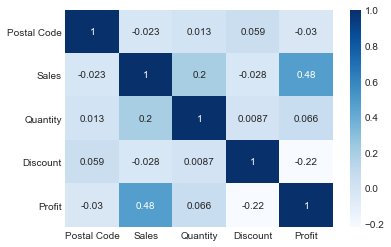

In [12]:
sns.heatmap(data.corr(), annot =True, cmap = "Blues")

### Dropping the irrelevant columns

In [13]:
data = data.drop("Postal Code", axis =1)

In [14]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

## Visualization of some Important Features

### Shipment Mode

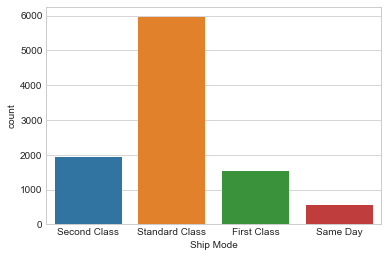

In [15]:
sns.countplot(x='Ship Mode', data=data)
plt.show()

#### Observation
Standard  Class is the most preferred Shipment mode

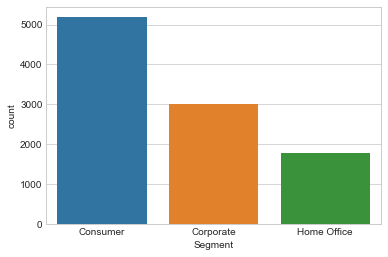

In [16]:
sns.countplot(x='Segment', data=data)
plt.show()

### Plotting Category of the Products

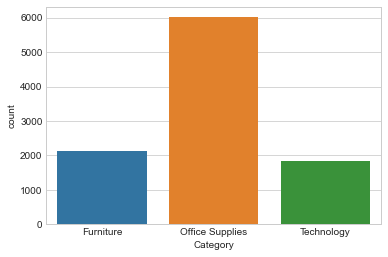

In [17]:
sns.countplot(x= "Category", data =data)
plt.show()

### Observation:
The Office supplies have highest demand and others are comparatively less.

### Plotting Discounts on the Products

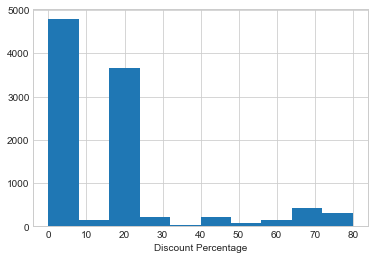

In [18]:
plt.hist(data.Discount*100)
plt.xlabel("Discount Percentage")
plt.show()

#### Observation:
Max discount give is 0 to 20%.

### Plotting Quantity of the Products

Text(0.5, 0, 'Quantity')

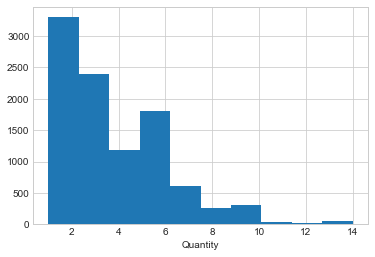

In [19]:
plt.hist(data.Quantity)
plt.xlabel("Quantity")

#### Obervation
Most customers buy 2 or 3 quantity.

# **Weak areas where we should work for profit**

## Calculating State vise profit

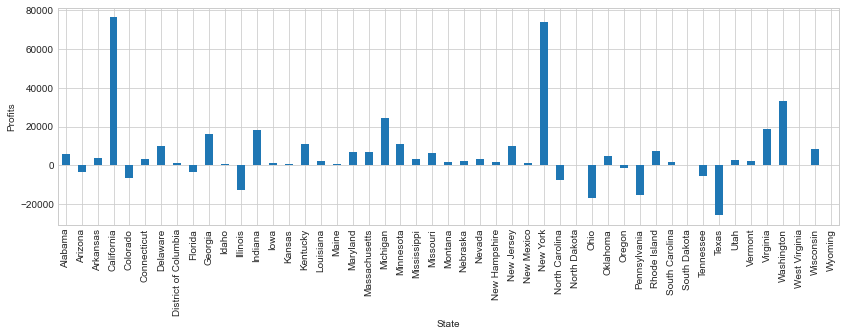

In [20]:
data.groupby("State")["Profit"].sum().plot(kind = "bar", figsize =(14,4))
plt.ylabel("Profits")
plt.show()

#### Result
* In the Above plot we see that California and New York is more profitable but on the other hand if we look towards the Taxas and towards other states which have less then 0 Profit so it is a big loss for the Super store 
* So we must should focus on those states which have profit less than zero


## Plotting State vise Sales 

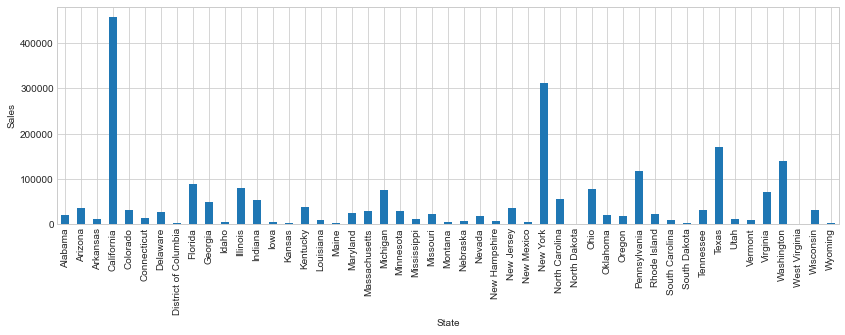

In [21]:
data.groupby("State")["Sales"].sum().plot(kind = "bar", figsize =(14,4))
plt.ylabel("Sales")
plt.show()

### Result 
* In the above plot we abserve that The California , New York and Texas have a high value of potential customers
* So we should concentrate more by increasing sales on these states to generate more profit.

* And as we see that the states like North Dakota, Wyoming and West Virginia have less or no sales at all so we should must focus on these kind of states to earn some  profit.


## Plotting Region Vise Sales and Profits

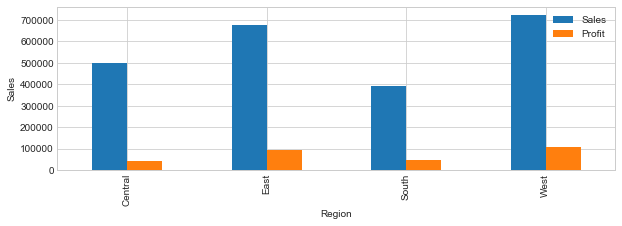

In [22]:
data.groupby('Region')[['Sales','Profit']].sum().plot(kind = "bar", figsize =(10,3))
plt.ylabel('Sales')
plt.show()

### Result:
* The west and East region generates most Profit
* Central and Southern region are generating less profit as compared to the Eastern and Western Region.
* Increase the sales in Central and Southern region in order to generate more profit in these region.
* Least sales are in Southern region, so we can attract this region by offering more discount

## Plotting Category Vise Sales and Profits

<AxesSubplot:xlabel='Category'>

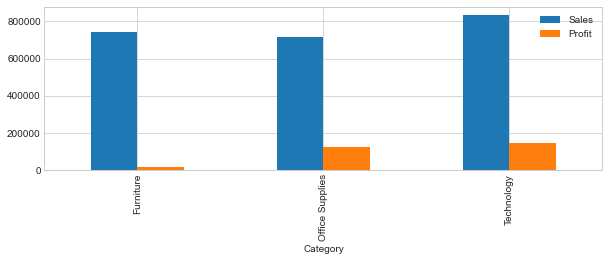

In [23]:
data.groupby(["Category"])[["Sales", "Profit"]].sum().plot(kind ="bar", figsize =(10,3))

### Result:
* In the above plot if we look towards the sale in all the three categories the values are differ by a small margin
* And if we look towards the profit so Furniture Category generate very less profit so We should limit the sales of furniture
* And should increase the sales of office supplies and technology as it is generating very less profit as compared to its sales, so by providing  focous towards thsese two categories we can earn more profit. 

## Plotting Sub-Category Vise Sales and Profits

<AxesSubplot:xlabel='Sub-Category'>

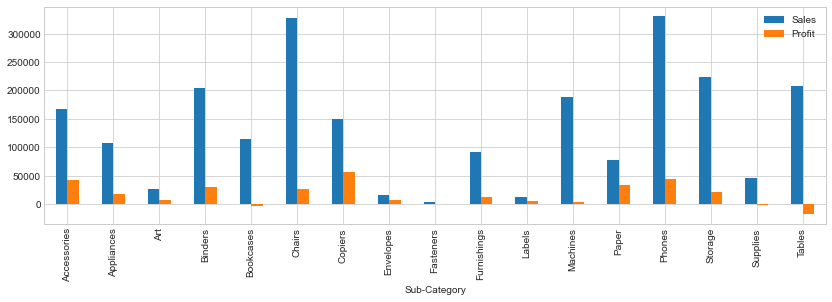

In [29]:
data.groupby("Sub-Category")[["Sales", "Profit"]].sum().plot(kind = "bar",
                                                             figsize = (14,4))

### Result:
* If We look towards the plot there are three weak areas Bookcases, Supplies and Tables as we are facing loss on the sales of these items. On the sales of tables we are facing the highest loss.
* So either we drop these items from our product list or we should provide focus towards them by making the pricing of these item low and also bring some discounts.

## Plotting Segment Vise Sales and Profits

<AxesSubplot:xlabel='Segment'>

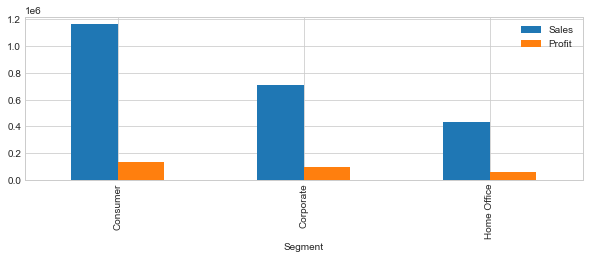

In [25]:
data.groupby("Segment")[["Sales","Profit"]].sum().plot(kind = "bar", figsize=(10,3))

### Result:
* We have highest purchases in consumer segment but we should also concentrate on corporate and home office segments to increase our sales and profit.

## Discount vs  Profit

C:\Users\Hp\anaconda3\envs\NCAI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

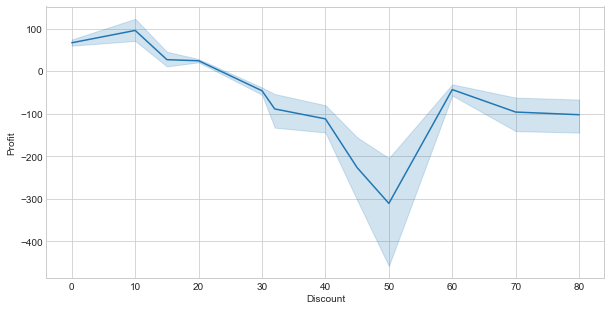

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data.Discount*100, data.Profit)

### Result:
* We are watching that as the value of the discount goes up the value of profit going down
* So we should offer Discounts towards the customers between 0 and 20%
* If we goes higher than that we will face loss